In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\EDA2\adult_with_headers.csv")
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
number=data.select_dtypes(include="number")
number

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [7]:
object=data.select_dtypes(include="object")
object

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [8]:
data.mode()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
data1=data.copy()

In [10]:
ss=StandardScaler()
standard=ss.fit_transform(number)
standard

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [11]:
ssdata=pd.DataFrame(standard,columns=ss.get_feature_names_out())
ssdata

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [12]:
mm=MinMaxScaler()
minmax=mm.fit_transform(number)
minmax

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [13]:
minmaxdata=pd.DataFrame(minmax,columns=mm.get_feature_names_out())
minmaxdata

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


**Discuss the scenarios where each scaling technique is preferred and why.**

Both Standard Scaling and Min-Max Scaling aim to normalize features but serve different purposes.
Standard Scaling centers data around zero with unit variance, making it ideal for normally distributed features and algorithms sensitive to variance (e.g., SVM, PCA, Logistic Regression).
Min-Max Scaling, on the other hand, transforms data into a bounded range (usually [0, 1]), which is useful for gradient-based or distance-based models like Neural Networks and KNN.
However, Min-Max is more sensitive to outliers, while Standard Scaling provides more stability in their presence.
Therefore, the choice depends on the model type, data distribution, and outlier presence.

In [14]:
object

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [15]:
object.race.value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [ ]:
le=LabelEncoder()
for col in object.drop(["income","race","sex"]
                       ,axis=1):
    data[col]=le.fit_transform(data[col])

In [30]:
data


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,work_hours_per_education
0,39,7,77516,9,13,4,1,1,White,Male,7.684784,0,40,39,<=50K,0.402501,2.857143
1,50,6,83311,9,13,2,4,0,White,Male,0.000000,0,13,39,<=50K,0.044772,0.928571
2,38,4,215646,11,9,0,6,1,White,Male,0.000000,0,40,39,<=50K,0.044772,4.000000
3,53,4,234721,1,7,2,6,0,Black,Male,0.000000,0,40,39,<=50K,0.044772,5.000000
4,28,4,338409,9,13,2,10,5,Black,Female,0.000000,0,40,5,<=50K,0.044772,2.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,White,Female,0.000000,0,38,39,<=50K,0.044772,2.923077
32557,40,4,154374,11,9,2,7,0,White,Male,0.000000,0,40,39,>50K,0.044772,4.000000
32558,58,4,151910,11,9,6,1,4,White,Female,0.000000,0,40,39,<=50K,0.044772,4.000000
32559,22,4,201490,11,9,4,1,3,White,Male,0.000000,0,20,39,<=50K,0.044772,2.000000


In [41]:
one=OneHotEncoder(sparse_output=False)
onehot=one.fit_transform(object[["race","sex","income"]])
onehot_df=pd.DataFrame(onehot,columns=one.get_feature_names_out())
onehot_df

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


•	**Discuss the pros and cons of One-Hot Encoding and Label Encoding**

One-Hot Encoding creates binary columns for each category, making it ideal for nominal features without intrinsic order but can increase dimensionality.
Label Encoding assigns integer labels to categories, conserving space but can introduce unintended ordinal relationships.
In practice, One-Hot Encoding is preferred for linear or distance-based models, while Label Encoding works best for tree-based algorithms where ordinal relationships do not mislead the model.

In [19]:
data['net_capital'] = data['capital_gain'] - data['capital_loss']
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K,2174
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K,0
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K,0
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K,0
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,White,Female,0,0,38,39,<=50K,0
32557,40,4,154374,11,9,2,7,0,White,Male,0,0,40,39,>50K,0
32558,58,4,151910,11,9,6,1,4,White,Female,0,0,40,39,<=50K,0
32559,22,4,201490,11,9,4,1,3,White,Male,0,0,20,39,<=50K,0


In [20]:
data['work_hours_per_education'] = data['hours_per_week'] / (data['education_num'] + 1)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,work_hours_per_education
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K,2174,2.857143
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K,0,0.928571
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K,0,4.000000
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K,0,5.000000
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K,0,2.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,White,Female,0,0,38,39,<=50K,0,2.923077
32557,40,4,154374,11,9,2,7,0,White,Male,0,0,40,39,>50K,0,4.000000
32558,58,4,151910,11,9,6,1,4,White,Female,0,0,40,39,<=50K,0,4.000000
32559,22,4,201490,11,9,4,1,3,White,Male,0,0,20,39,<=50K,0,2.000000


In [21]:
data["net_capital"].unique()

array([ 2174,     0, 14084,  5178, -2042, -1408, -1902,  5013,  2407,
       14344, -1573, 15024,  7688, 34095, -1887,  4064, -1719, -1762,
        4386, -1564, -2179, -1816, -1980, -1977,  7298, -1876, -1340,
       -2206,  1409,  3674, -1741,  1055,  3464, -1485,  2050, -2339,
       -2415,  2176,   594, -1380, 20051,  6849,  4101,  1111,  8614,
        3411, -1721,  2597, 25236, -2051,  4650,  9386, -2377, -1669,
       -2352,  2463,  3103, -1672,  -653, 10605, -2392,  2964,  3325,
       -1504,  2580, -2001,  3471, -1590, -1651,  4865, 99999,  6514,
       -1628,  1471,  2329, -1848,  2105,  2885, 25124, 10520, -1740,
        2202, -2002,  2961, 27828,  6767,  2228, -1579,  1506, 13550,
        2635, -2258,  5556, -1602,  -419,  4787,  3781,  3137, -2547,
       -2174,  3818,  3942,   914,   401,  2829,  2977,  4934, -2205,
       -1726, -2444,  2062, -1138, -2238,  2354,  5455, 15020,  1424,
        -625,  3273, 22040,  -213,  4416,  3908, 10566,   991,  4931,
        1086, -1539,

In [22]:
data.select_dtypes(include="number").skew()

age                          0.558743
workclass                   -0.752024
fnlwgt                       1.446980
education                   -0.934042
education_num               -0.311676
marital_status              -0.013508
occupation                   0.114583
relationship                 0.786818
capital_gain                11.953848
capital_loss                 4.594629
hours_per_week               0.227643
native_country              -3.658303
net_capital                 11.871934
work_hours_per_education     3.333826
dtype: float64

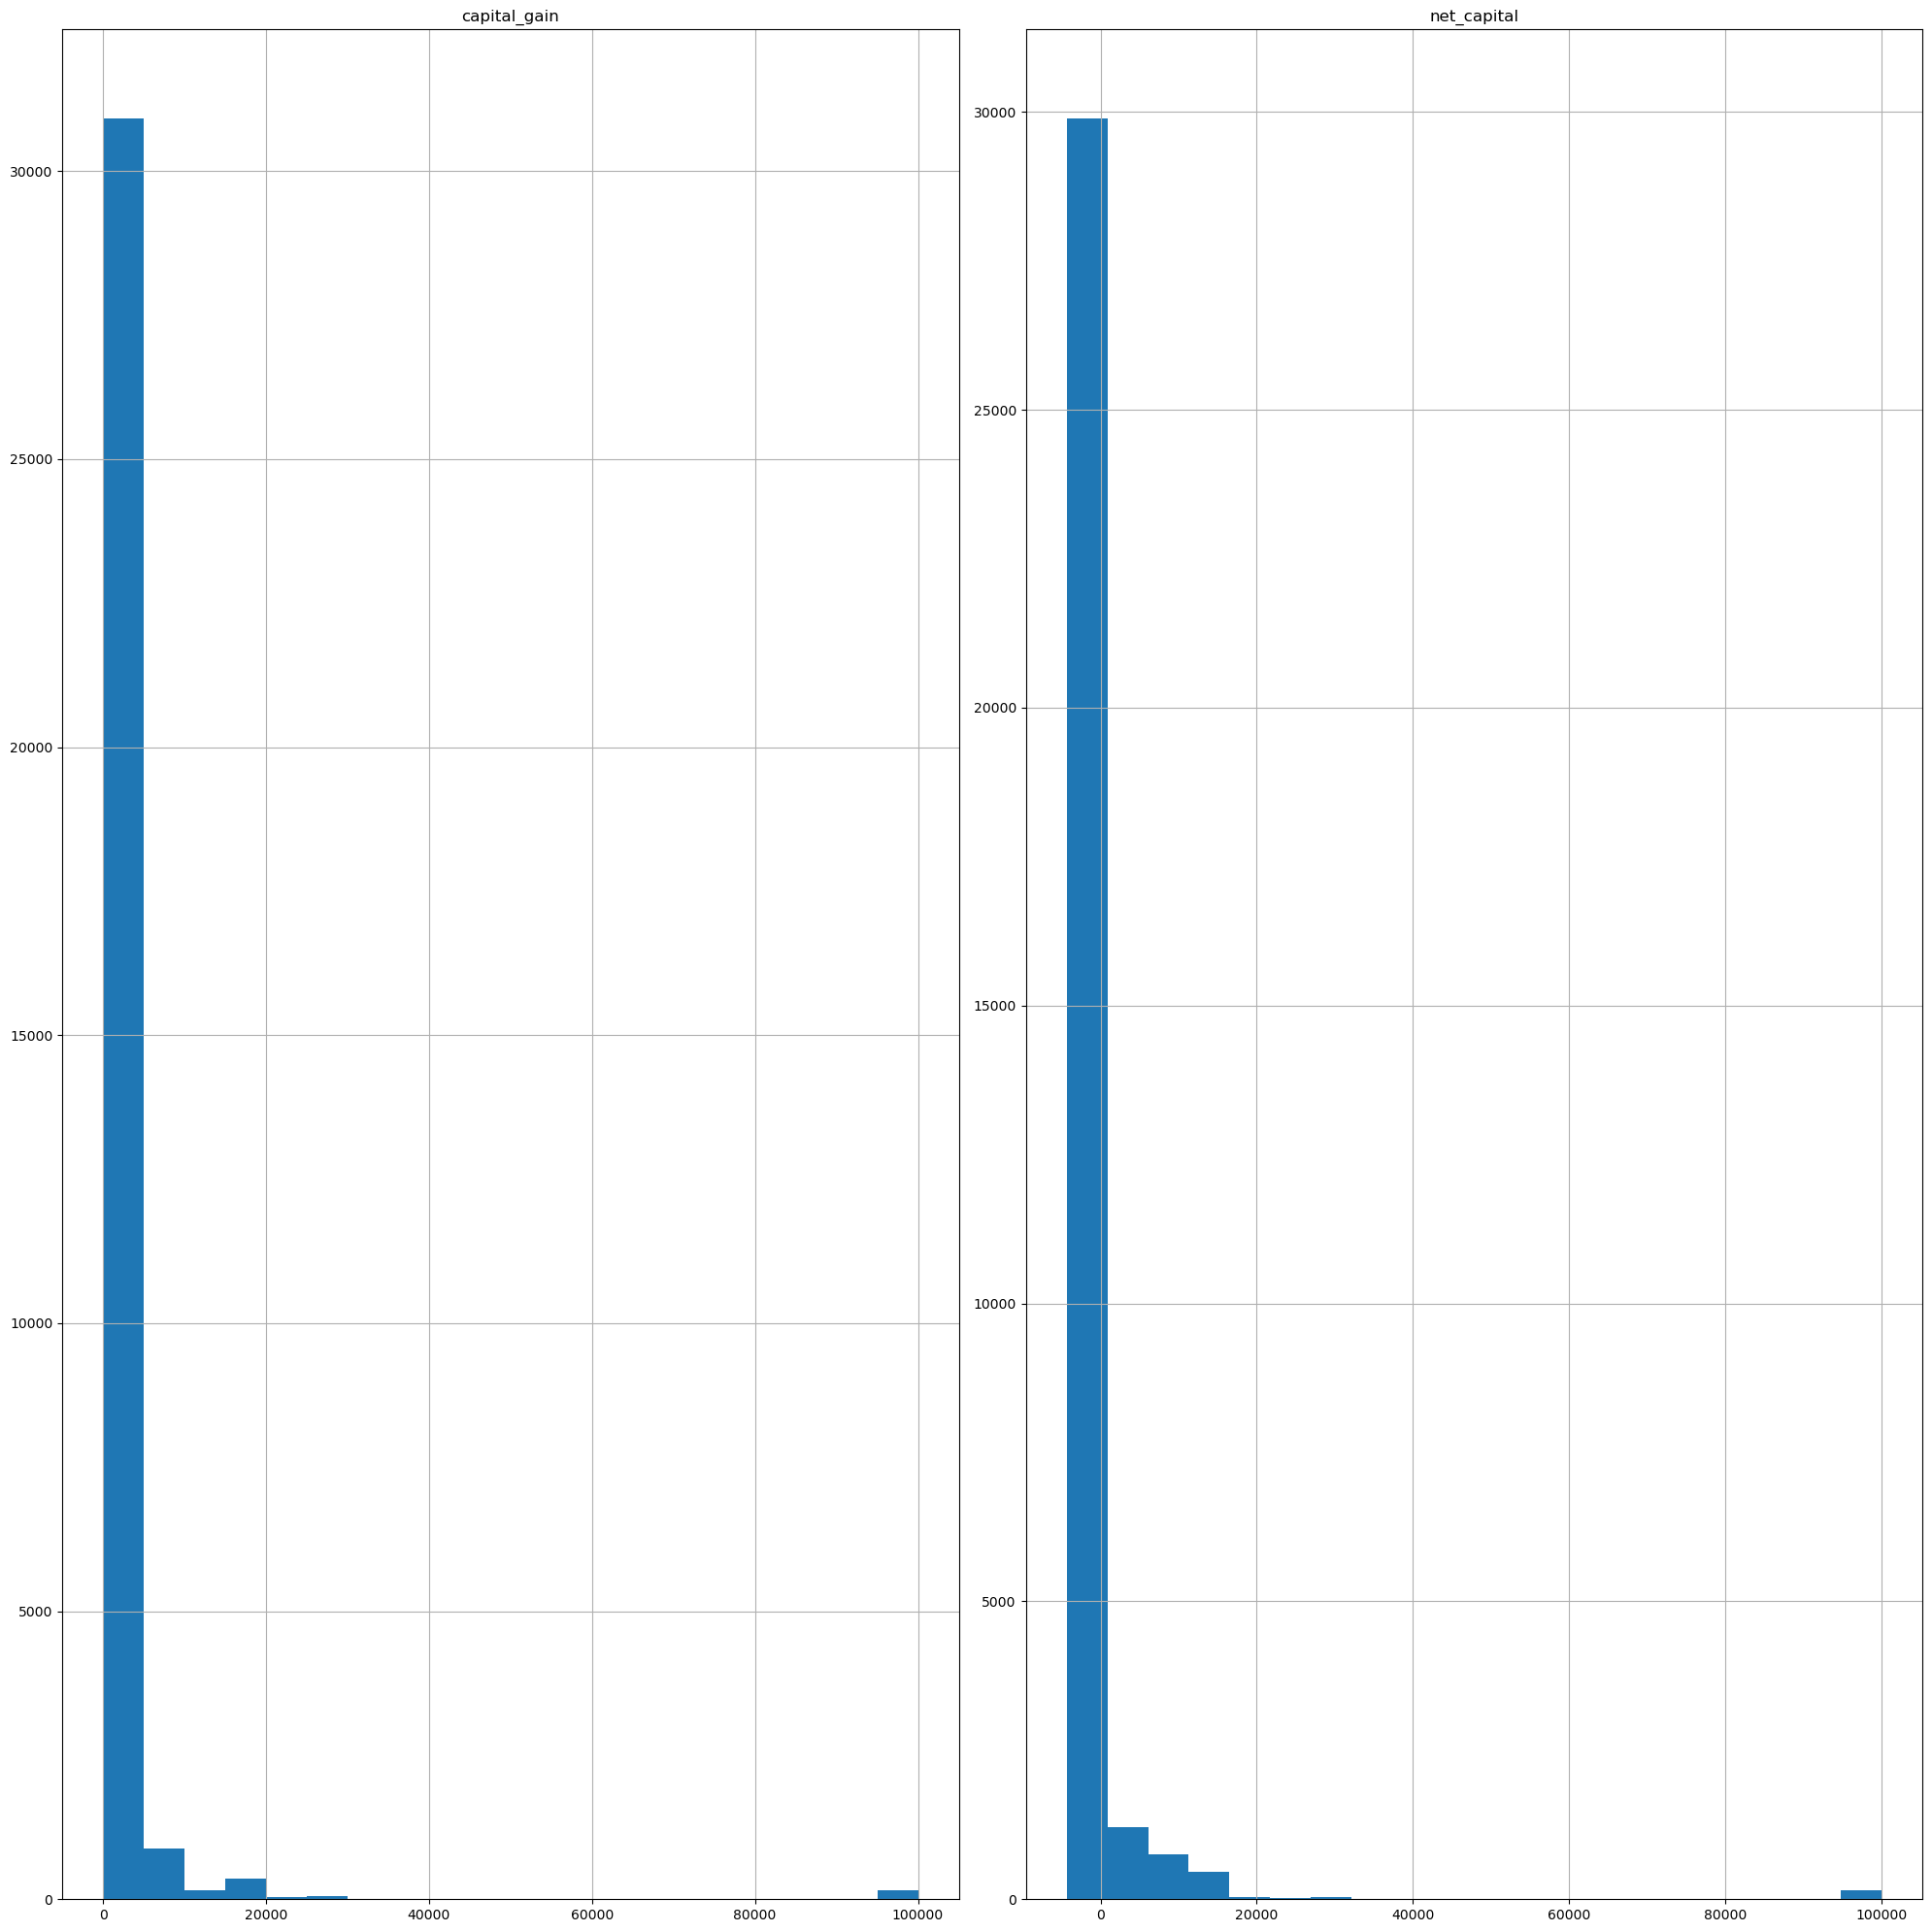

In [194]:
data[["capital_gain","net_capital"]].hist(bins=20,figsize=(20,20),layout=(1,2))
plt.tight_layout()
plt.show()

In [23]:
data["capital_gain"]=np.log1p(data["capital_gain"])

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
data["net_capital"] = pt_yeojohnson.fit_transform(data[["net_capital"]])

In [26]:
data.select_dtypes(include="number").skew()

age                         0.558743
workclass                  -0.752024
fnlwgt                      1.446980
education                  -0.934042
education_num              -0.311676
marital_status             -0.013508
occupation                  0.114583
relationship                0.786818
capital_gain                3.096144
capital_loss                4.594629
hours_per_week              0.227643
native_country             -3.658303
net_capital                 0.798757
work_hours_per_education    3.333826
dtype: float64

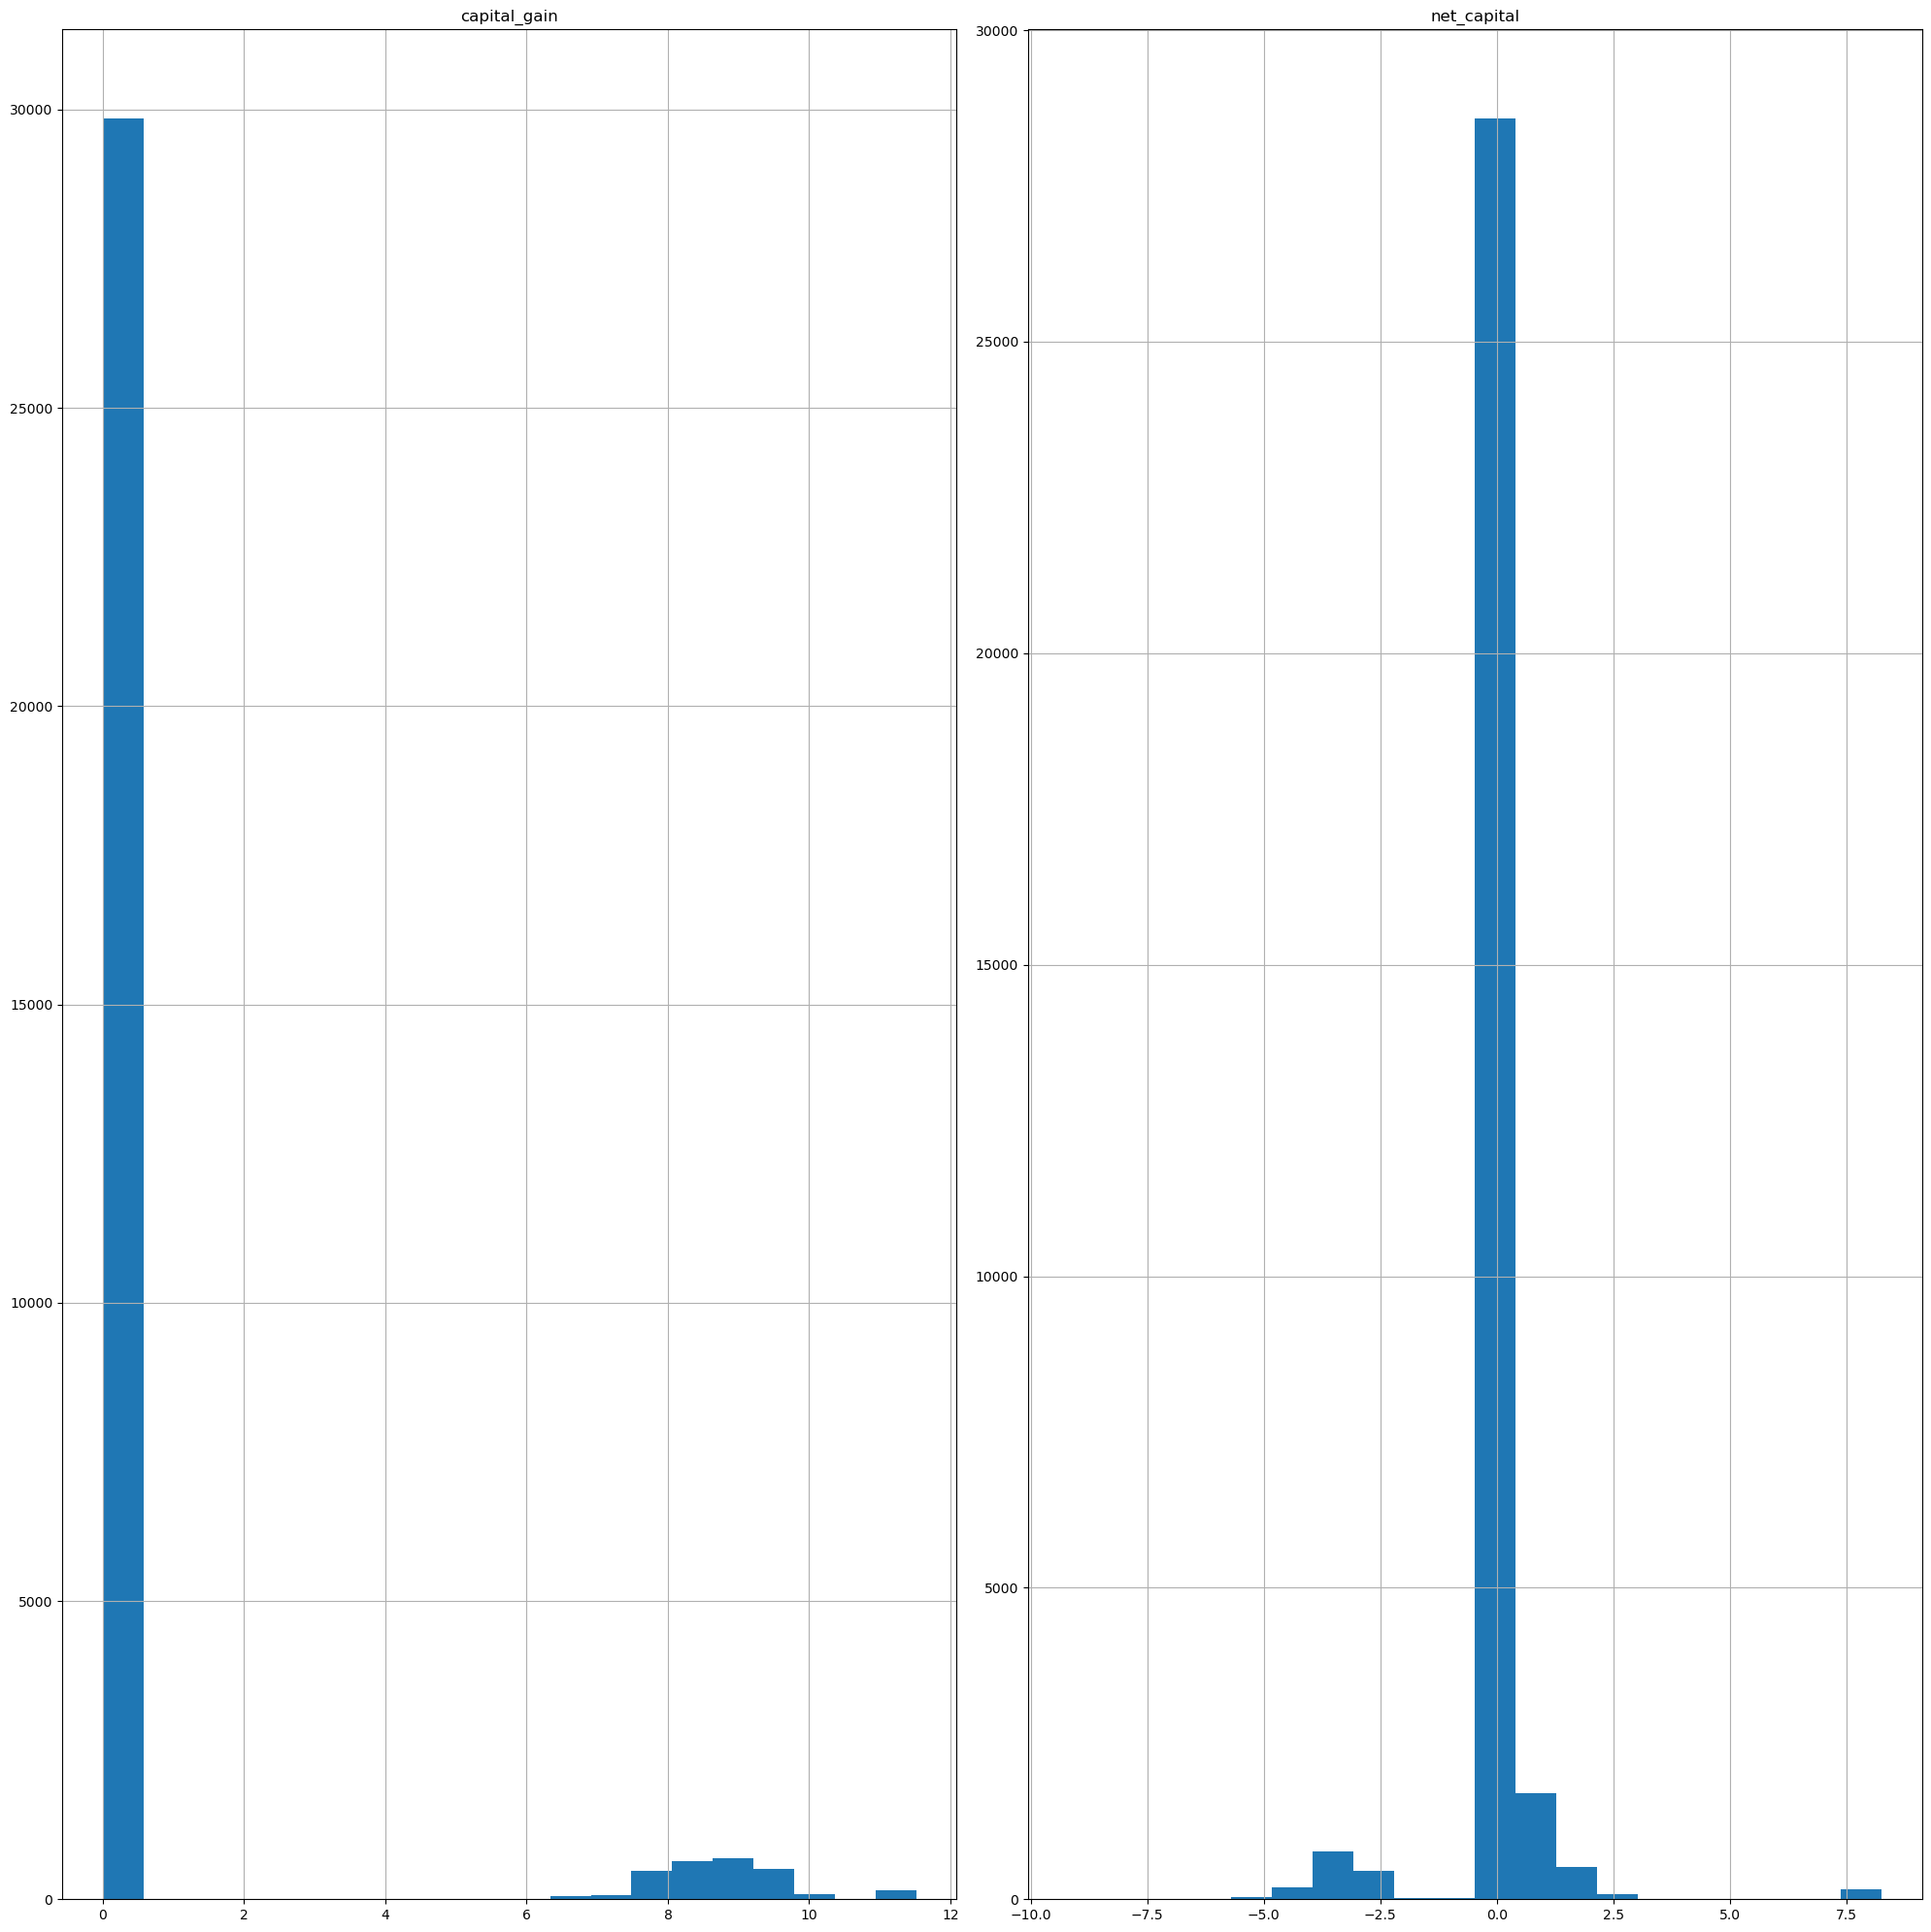

In [27]:
data[["capital_gain","net_capital"]].hist(bins=20,figsize=(20,20),layout=(1,2))
plt.tight_layout()
plt.show()

In [59]:
data.drop[["race","sex"]]

TypeError: 'method' object is not subscriptable

In [42]:
finaldata=pd.concat([ssdata,data.iloc[:,[1,3,5,6,7,13]],onehot_df],axis=1)

In [45]:
finaldata.drop(["income_ <=50K"],axis=1,inplace=True)

In [46]:
finaldata

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,39,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,4,7,2,13,5,39,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4,11,2,7,0,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4,11,6,1,4,39,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,4,11,4,1,3,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [47]:
from sklearn.ensemble import IsolationForest

In [50]:
iso=IsolationForest(contamination=0.02,random_state=42)
iso.fit(finaldata)


IsolationForest(contamination=0.02, random_state=42)

In [52]:
y_pred=iso.predict(finaldata)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 652, 1: 31909}

The Isolation Forest algorithm was applied to the encoded dataset to detect and remove outliers.
Out of 32,561 total samples, 652 were identified as outliers (≈2%) and removed, leaving a cleaner dataset of 31,909 samples.
Removing outliers helps ensure the model learns from representative data rather than being influenced by extreme or erroneous values, thereby improving both accuracy and robustness.

In [58]:
import sys
!{sys.executable} -m pip install ppscore


  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2527 lines of output]
  <string>:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  C:\Users\rosha\AppData\Local\Temp\pip-build-env-5mqhoo0x\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license

In [56]:
 !pip install ppscore
import ppscore as pps

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2527 lines of output]
  <string>:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  C:\Users\rosha\AppData\Local\Temp\pip-build-env-jlwiyme6\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license

ModuleNotFoundError: No module named 'ppscore'

In [57]:
pps_matrix = pps.matrix(finaldata)

# Display only relevant columns
pps_matrix

NameError: name 'pps' is not defined